In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

Import datas

In [2]:
df_movies = pd.read_csv('../../data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
df_movies.columns = ['wiki_id','freebase_id','name','release_date','revenue','runtime','languages','countries','genres']

df_characters = pd.read_csv('../../data/MovieSummaries/character.metadata.tsv', sep='\t', header=None)
df_characters.columns = ['wiki_id','freebase_id','release_date','character','birth_date','gender','height','ethnicity_freebase_id','name','age','character_actor_freebase_id','character_freebase_id','actor_freebase_id']

df_cluster = pd.read_csv('../../data/MovieSummaries/name.clusters.txt', sep='	', header=None)
df_cluster.columns = ['cluster','character_actor_freebase_id']

df_summary = pd.read_csv('../../data/MovieSummaries/plot_summaries.txt', sep='	', header=None)
df_summary.columns = ['wiki_id','summary']

Data preprocessing

In [3]:
def convertDate(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    return df

df_movies = convertDate(df_movies, ['release_date'])
df_characters = convertDate(df_characters, ['release_date', 'birth_date'])

In [4]:
def extractFreebaseValues(freebase_data):
    if pd.isna(freebase_data):
        return None
    try:
        data_dict = ast.literal_eval(freebase_data)
        if isinstance(data_dict, dict):
            return ', '.join(data_dict.values())
        else:
            return freebase_data
    except (SyntaxError, ValueError):
        return freebase_data

def transformFreebaseData(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: extractFreebaseValues(x))
    return df

df_movies = transformFreebaseData(df_movies, ['genres', 'languages', 'countries'])

Data exploration

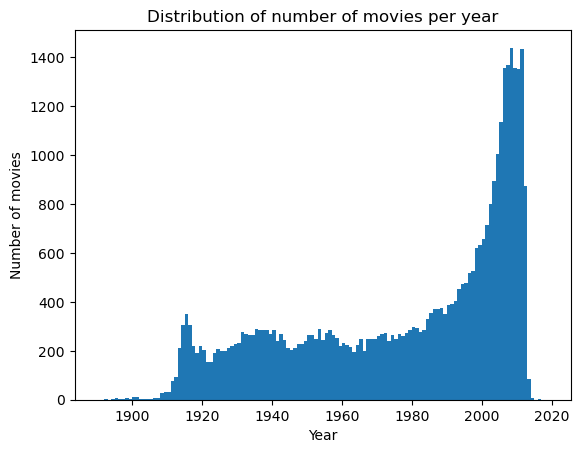

In [5]:
# Distribution of number of movies per year
plt.hist(df_movies['release_date'].dt.year, bins=range(1890, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Distribution of number of movies per year')
plt.show()

In [ ]:
# Distribution of movies per year group by countries
df_movies['release_year'] = df_movies['release_date'].dt.year

df_movies_countries = df_movies.explode('countries')
df_movies_countries = df_movies_countries.groupby(['release_year', 'countries']).size().unstack().fillna(0)

df_movies_countries.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Distribution of movies per year group by countries')
plt.show()

KeyboardInterrupt: 